In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
final_df = pd.read_csv('../Datasets/training.csv')
final_df.tail()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
9316,Netherlands,Wales,10,18,1,81.0,74.0,85.0,83.0,84.0,75.0,73.0,78.0
9317,Poland,Belgium,26,2,0,87.0,89.0,75.0,85.0,76.0,81.0,86.0,86.0
9318,Chile,Ghana,28,60,0,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0
9319,Japan,Tunisia,23,35,0,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0
9320,Korea Republic,Egypt,29,32,1,75.0,70.0,73.0,80.0,74.0,70.0,79.0,71.0


In [3]:
# GROUP STAGE MODELING


In [4]:
# I save the original data frame in a flag to then train the final pipeline
pipe_DF = final_df
# Dummies for categorical columns
final_df = pd.get_dummies(final_df)

In [5]:
# I split the dataset into training, testing and validation.


In [6]:
X = final_df.drop('Team1_Result',axis=1)
y = final_df['Team1_Result']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [8]:
#  Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

In [9]:
# Defining function to display the confusion matrix quickly.

In [10]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [11]:
# Random Forest 

              precision    recall  f1-score   support

           0       0.49      0.62      0.55       116
           1       0.66      0.76      0.71       241
           2       0.27      0.10      0.15       110

    accuracy                           0.57       467
   macro avg       0.47      0.49      0.47       467
weighted avg       0.52      0.57      0.53       467



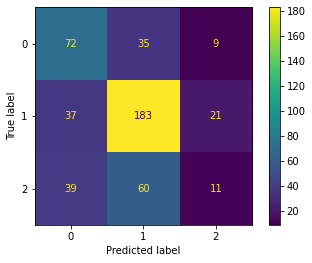

In [12]:
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

In [14]:
# Ada Boost Classifier

              precision    recall  f1-score   support

           0       0.45      0.50      0.47       116
           1       0.62      0.86      0.72       241
           2       0.33      0.01      0.02       110

    accuracy                           0.57       467
   macro avg       0.47      0.46      0.40       467
weighted avg       0.51      0.57      0.49       467



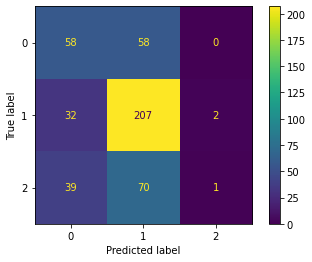

In [15]:
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

In [16]:
# XG bossting

              precision    recall  f1-score   support

           0       0.45      0.53      0.48       116
           1       0.63      0.79      0.70       241
           2       0.24      0.05      0.09       110

    accuracy                           0.55       467
   macro avg       0.44      0.46      0.42       467
weighted avg       0.49      0.55      0.50       467



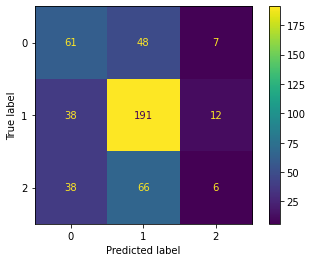

In [17]:
from xgboost import XGBClassifier
metrics_display(XGBClassifier(use_label_encoder=False))

In [18]:
# Neural network

In [19]:
import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras import Input

X_train.shape

(8388, 404)

Epoch 1/10
210/210 [==============================] - 3s 8ms/step - loss: 0.9983 - accuracy: 0.5352 - val_loss: 0.8913 - val_accuracy: 0.5912
Epoch 2/10
210/210 [==============================] - 1s 6ms/step - loss: 0.8981 - accuracy: 0.5952 - val_loss: 0.8981 - val_accuracy: 0.5936
Epoch 3/10
210/210 [==============================] - 1s 6ms/step - loss: 0.8692 - accuracy: 0.5991 - val_loss: 0.8990 - val_accuracy: 0.5870
Epoch 4/10
210/210 [==============================] - 1s 6ms/step - loss: 0.8550 - accuracy: 0.6095 - val_loss: 0.9081 - val_accuracy: 0.5828
Epoch 5/10
210/210 [==============================] - 1s 6ms/step - loss: 0.8437 - accuracy: 0.6140 - val_loss: 0.9038 - val_accuracy: 0.5858
Epoch 6/10
210/210 [==============================] - 1s 6ms/step - loss: 0.8313 - accuracy: 0.6161 - val_loss: 0.9144 - val_accuracy: 0.5882
Epoch 7/10
210/210 [==============================] - 1s 7ms/step - loss: 0.8257 - accuracy: 0.6189 - val_loss: 0.9118 - val_accuracy: 0.5840
Epoch 

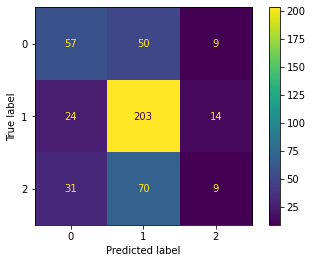

In [20]:
model = Sequential()
model.add(Input(shape=(404,)))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)

In [21]:
# The XGBoost model performs better than the others, 
# so I will tune its hyperparameters and evaluate the performance based on the validation dataset.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [200,250,300,350,400,450,500],
    "max_depth" : [3,4,5,6,7,8,9],
    "gamma" : [0.001,0.01,0.1],
    "learning_rate" : [0.001,0.01,0.1]
}

In [23]:
# make a GridSearchCV object
GS = GridSearchCV(estimator = XGBClassifier(use_label_encoder=False),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)

In [24]:
GS.fit(X_train,y_train)

Fitting 5 folds for each of 441 candidates, totalling 2205 fits
[CV 1/5] END gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.604 total time=  22.5s
[CV 2/5] END gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.595 total time=  22.4s
[CV 3/5] END gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.580 total time=  25.8s
[CV 4/5] END gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.585 total time=  32.9s
[CV 5/5] END gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.571 total time=  29.9s
[CV 1/5] END gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=250;, score=0.604 total time=  34.8s
[CV 2/5] END gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=250;, score=0.598 total time=  29.2s
[CV 3/5] END gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=250;, score=0.580 total time=  41.4s
[CV 4/5] END gamma=0.001, learning_rate=0.001, max_depth

KeyboardInterrupt: 

In [25]:
# print(GS.best_params_) 

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [26]:
# Initially, I validate the model with its default parameters, and then I will validate it with its tuned parameters.

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       121
           1       0.66      0.84      0.74       240
           2       0.35      0.11      0.17       105

    accuracy                           0.62       466
   macro avg       0.53      0.52      0.50       466
weighted avg       0.57      0.62      0.57       466



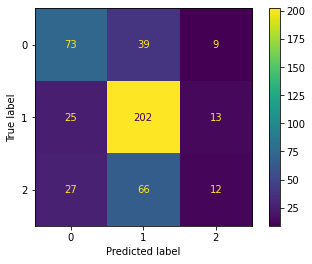

In [27]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

In [28]:
# Tuned Hyperparameters

              precision    recall  f1-score   support

           0       0.57      0.63      0.60       121
           1       0.64      0.88      0.75       240
           2       0.25      0.01      0.02       105

    accuracy                           0.62       466
   macro avg       0.49      0.51      0.45       466
weighted avg       0.54      0.62      0.54       466



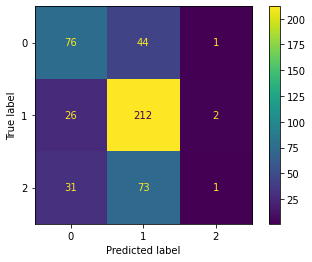

In [29]:
model = XGBClassifier(use_label_encoder = False, gamma = 0.01, learning_rate = 0.01, n_estimators = 300, max_depth = 4)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

In [30]:
# The model improves a bit, so I will create a pipe to use the model later easily.

In [31]:
# Creating a pipeline for the XGB model

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(),['Team1', 'Team2']),remainder='passthrough')

pipe_X = pipe_DF.drop('Team1_Result',axis=1)
pipe_y = pipe_DF['Team1_Result']

from sklearn.pipeline import make_pipeline
pipe_League = make_pipeline(column_trans,StandardScaler(with_mean=False),XGBClassifier(use_label_encoder=False, gamma= 0.01, learning_rate= 0.01, n_estimators= 300, max_depth= 4))
pipe_League.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_...
                               gamma=0.01, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.01, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=4, max_leaves=0, min_child_weight

In [33]:
import joblib
joblib.dump(pipe_League,"../groups_stage_prediction.pkl")

['../groups_stage_prediction.pkl']

In [34]:
# Choosing the model
# Removing Draw status

In [35]:
knock_df = pipe_DF[pipe_DF['Team1_Result'] != 2]

In [36]:
pipe_knock_df = knock_df
knock_df = pd.get_dummies(knock_df)
X = knock_df.drop('Team1_Result',axis=1)
y = knock_df['Team1_Result']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [37]:
# Ada Boost Classifier

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       243
           1       0.81      0.86      0.84       479

    accuracy                           0.78       722
   macro avg       0.75      0.74      0.74       722
weighted avg       0.77      0.78      0.77       722



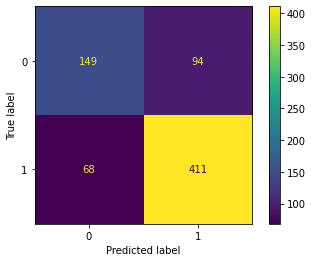

In [38]:
metrics_display(AdaBoostClassifier())

In [39]:
# Rand For

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       243
           1       0.82      0.83      0.82       479

    accuracy                           0.76       722
   macro avg       0.73      0.73      0.73       722
weighted avg       0.76      0.76      0.76       722



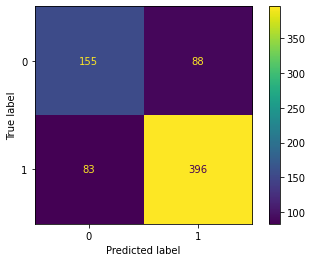

In [40]:
metrics_display(RandomForestClassifier())

In [41]:
# XG bosst

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       243
           1       0.82      0.85      0.84       479

    accuracy                           0.78       722
   macro avg       0.75      0.74      0.75       722
weighted avg       0.78      0.78      0.78       722



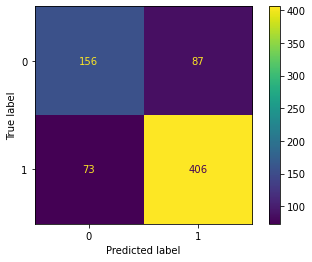

In [42]:
metrics_display(XGBClassifier(use_label_encoder=False))

In [43]:
# Neural network

In [44]:
X_train.shape

(5772, 399)

Epoch 1/10
145/145 [==============================] - 2s 9ms/step - loss: 1.4855 - accuracy: 0.6615 - val_loss: 0.5102 - val_accuracy: 0.7377
Epoch 2/10
145/145 [==============================] - 1s 7ms/step - loss: 0.5884 - accuracy: 0.7074 - val_loss: 0.5078 - val_accuracy: 0.7766
Epoch 3/10
145/145 [==============================] - 1s 7ms/step - loss: 0.5298 - accuracy: 0.7412 - val_loss: 0.4809 - val_accuracy: 0.7827
Epoch 4/10
145/145 [==============================] - 1s 8ms/step - loss: 0.5209 - accuracy: 0.7438 - val_loss: 0.4835 - val_accuracy: 0.7818
Epoch 5/10
145/145 [==============================] - 1s 8ms/step - loss: 0.5098 - accuracy: 0.7490 - val_loss: 0.4971 - val_accuracy: 0.7714
Epoch 6/10
145/145 [==============================] - 1s 7ms/step - loss: 0.5019 - accuracy: 0.7540 - val_loss: 0.4854 - val_accuracy: 0.7766
Epoch 7/10
145/145 [==============================] - 1s 7ms/step - loss: 0.5005 - accuracy: 0.7496 - val_loss: 0.4706 - val_accuracy: 0.7810
Epoch 

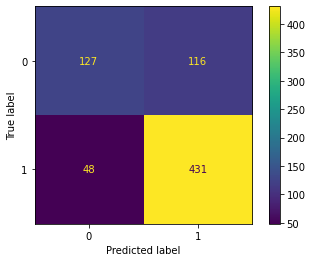

In [45]:
model = Sequential()
model.add(Input(shape=(399,)))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)